<center><h1>REGRESIÓN LINEAL</h1></center>

En el contexto de la IA, la regresión lineal se aplica para construir un modelo matemático que relaciona variables de entrada (características) con una variable de salida (objetivo). <br>Por ejemplo, supongamos que deseamos predecir el precio de una casa en función de su tamaño y edad. Podemos usar la regresión lineal para encontrar la relación entre estas variables y luego utilizar el modelo resultante para predecir el precio de casas nuevas.

<br>En este notebook abordaremos la regresión lineal aplicada a la predicción de aprendices que se encuentran en riesgo de deserción, para lo cual tendremos los siguientes elementos: <br>
<ul>
    <li> Lectura y análisis de los datos </li>
    <li> Limpieza y transformación de los datos </li>
    <li> Entrenamiento de un modelo de regresión lineal </li>
    <li> Evaluación del modelo </li>
</ul>

<h2>Lectura y análisis de los datos</h2>

Realizar la instalación de scikit-learn <br>pip install scikit-learn

In [1]:
#importar las librerias

# Procesar la informacion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regresion Lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Evaluacion del Modelo
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar el dataset
df = pd.read_excel('Dataset_final.xlsx')

In [3]:
#Obtener informacion del dataset - Etiquetas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Documento                  295 non-null    int64  
 1   Nombre                     295 non-null    object 
 2   Apellidos                  295 non-null    object 
 3   Direccción                 295 non-null    object 
 4   Teléfono                   295 non-null    object 
 5   Edad                       295 non-null    int64  
 6   Estatura                   295 non-null    float64
 7   Área de residencia         294 non-null    object 
 8   Tipo colegio               294 non-null    object 
 9   Género                     294 non-null    object 
 10  Estrato                    294 non-null    float64
 11  Nota Matematicas           294 non-null    float64
 12  Nota Lecto Escritura       294 non-null    float64
 13  Apoyo económico de padres  294 non-null    object 

In [4]:
#Obtener informacion del dataset - Datos
df

,Documento,Nombre,Apellidos,Direccción,Teléfono,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
0,115320053,Sofia,Gómez,"Calle 100 #25-26, Bogotá, Colombia",+57 311 2345678,23,1.57,Urbana,Público,Femenino,3.0,1.0,3.0,No,11.0
1,1105101947,Santiago,González,"Carrera 14 #10-20, Medellín, Colombia",+57 317 3456789,19,1.75,Urbana,Privado,Masculino,4.0,5.0,4.0,Sí,11.0
2,1023100010,Valentina,Herrera,"Vereda San José, Girardota, Colombia",+57 312 4567890,16,1.63,Rural,Público,Femenino,1.0,3.0,2.0,Sí,9.0
3,1208200021,Juan,Rojas,"Calle 30 #18-15, Bucaramanga, Colombia",+57 320 5678901,17,1.80,Urbana,Público,Masculino,2.0,2.0,2.0,No,10.0
4,1050500050,Catalina,Jiménez,"Avenida 5 #23-45, Cali, Colombia",+57 319 6789012,15,1.64,Urbana,Privado,Femenino,4.0,4.0,5.0,Sí,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1645678901,Isabel,Gonzalez,Av. Bolívar 789,3478901,16,1.62,Urbana,Público,Femenino,4.0,4.0,4.0,Si,11.0
291,1656789012,Julio,Perez,El Bosque 234,3123456,18,1.80,Rural,Privado,Masculino,5.0,5.0,5.0,Si,11.0
292,1667890123,Ana,Martinez,Carrera 7 567,3289012,17,1.65,Urbana,Público,Femenino,2.0,3.0,3.0,No,10.0
293,1678901234,David,Perez,Barrio Las Margaritas 123,3256789,16,1.80,Urba,Privado,Masculino,3.0,3.0,3.0,Si,10.0


<h2>Limpieza y transformación de los datos</h2>

In [5]:
#Eliminar las filas con valores nulos
df = df.dropna()

In [6]:
#Obtener informacion del dataset - Etiquetas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Documento                  294 non-null    int64  
 1   Nombre                     294 non-null    object 
 2   Apellidos                  294 non-null    object 
 3   Direccción                 294 non-null    object 
 4   Teléfono                   294 non-null    object 
 5   Edad                       294 non-null    int64  
 6   Estatura                   294 non-null    float64
 7   Área de residencia         294 non-null    object 
 8   Tipo colegio               294 non-null    object 
 9   Género                     294 non-null    object 
 10  Estrato                    294 non-null    float64
 11  Nota Matematicas           294 non-null    float64
 12  Nota Lecto Escritura       294 non-null    float64
 13  Apoyo económico de padres  294 non-null    object 

In [7]:
# CONVERSION DE ETIQUETAS SEGUN EL METODO

#Reemplazar Sí por Si en la columna "Apoyo económico de padres"
df['Apoyo económico de padres'] = df['Apoyo económico de padres'].replace('Sí', 'Si')

#Crear la columna "Apoyo economico" y asignarle un valor de 0 si es no o 1 si es si
df['Apoyo económico de padres'] = np.where(df['Apoyo económico de padres'] == 'Si', 1, 0)

#Crear la columna "Género" -> Femenimo:0 y Masculino:1
df['Género'] = np.where(df['Género'] == 'Femenino', 0, 1)

#Crear la columna "Colegio" -> Público:0 y Privado:1
df['Tipo colegio'] = np.where(df['Tipo colegio'] == 'Público', 0, 1)

#Crear la columna "Área de residencia" -> Urbana:0 y Rural:1
df['Área de residencia'] = np.where(df['Área de residencia'] == 'Urbana', 0, 1)

<ipython-input-7-7c1a22047750>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Apoyo económico de padres'] = df['Apoyo económico de padres'].replace('Sí', 'Si')
<ipython-input-7-7c1a22047750>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Apoyo económico de padres'] = np.where(df['Apoyo económico de padres'] == 'Si', 1, 0)
<ipython-input-7-7c1a22047750>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [8]:
#Eliminar las columnas que no se van a utilizar
df = df.drop(['Documento', 'Nombre', 'Apellidos', 'Direccción', 'Teléfono'], axis=1)

In [9]:
df

,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
0,23,1.57,0,0,0,3.0,1.0,3.0,0,11.0
1,19,1.75,0,1,1,4.0,5.0,4.0,1,11.0
2,16,1.63,1,0,0,1.0,3.0,2.0,1,9.0
3,17,1.80,0,0,1,2.0,2.0,2.0,0,10.0
4,15,1.64,0,1,0,4.0,4.0,5.0,1,10.0
...,...,...,...,...,...,...,...,...,...,...
290,16,1.62,0,0,0,4.0,4.0,4.0,1,11.0
291,18,1.80,1,1,1,5.0,5.0,5.0,1,11.0
292,17,1.65,0,0,0,2.0,3.0,3.0,0,10.0
293,16,1.80,1,1,1,3.0,3.0,3.0,1,10.0


<ipython-input-10-481a145dd8a4>:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  correlation_matrix.values[[range(correlation_matrix.shape[0])]*2] = 0


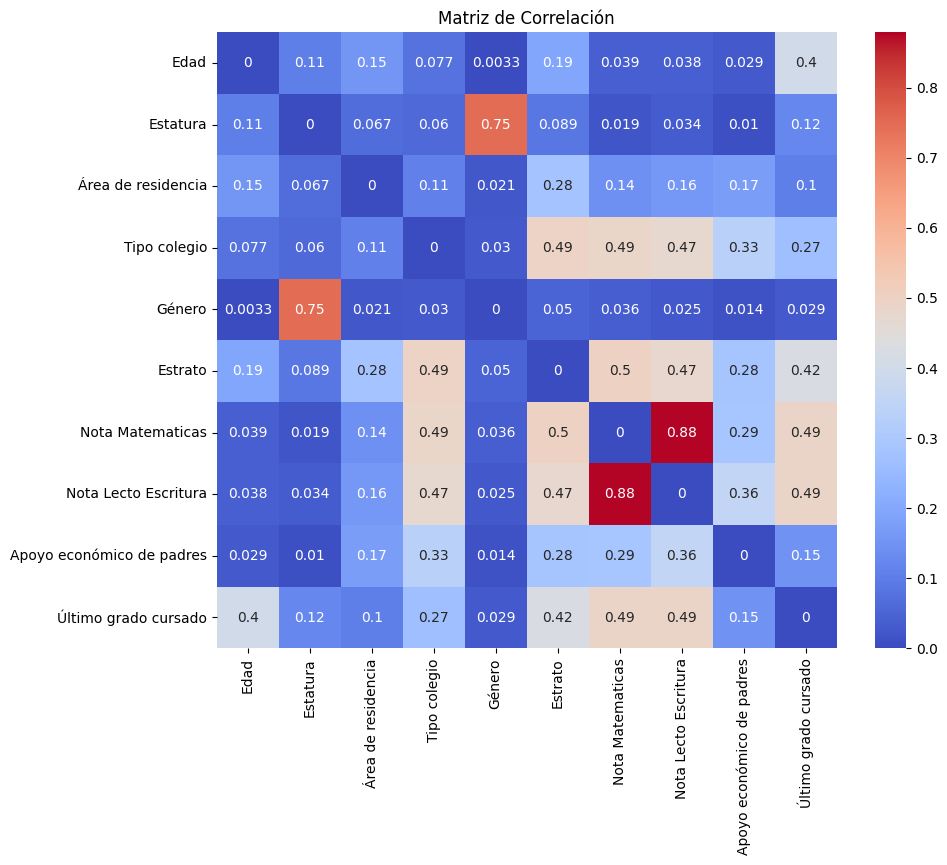

In [10]:
# calcular la matriz de correlación de todas las variables del DataFrame
correlation_matrix = df.corr().abs()

# Excluir la diagonal de la matriz de correlación
correlation_matrix.values[[range(correlation_matrix.shape[0])]*2] = 0

# Obtener las variables más correlacionadas
most_correlated = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Visualizar las variables más correlacionadas
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [11]:
# Imprimir las variables más correlacionadas
for (var1, var2), correlacion in most_correlated.items():
    print(f"Las variables '{var1}' y '{var2}' tienen una correlación de {correlacion}.")

Las variables 'Nota Lecto Escritura' y 'Nota Matematicas' tienen una correlación de 0.8791409294144626.
Las variables 'Género' y 'Estatura' tienen una correlación de 0.748623045517334.
Las variables 'Estrato' y 'Nota Matematicas' tienen una correlación de 0.49980986674334094.
Las variables 'Tipo colegio' y 'Estrato' tienen una correlación de 0.4947099202830531.
Las variables 'Último grado cursado' y 'Nota Matematicas' tienen una correlación de 0.4902080821294931.
Las variables 'Nota Lecto Escritura' y 'Último grado cursado' tienen una correlación de 0.48879918670351447.
Las variables 'Tipo colegio' y 'Nota Matematicas' tienen una correlación de 0.4854725618156738.
Las variables 'Estrato' y 'Nota Lecto Escritura' tienen una correlación de 0.47449196012504585.
Las variables 'Tipo colegio' y 'Nota Lecto Escritura' tienen una correlación de 0.4734696843131039.
Las variables 'Último grado cursado' y 'Estrato' tienen una correlación de 0.4248114755826642.
Las variables 'Edad' y 'Último grado

In [12]:
#Eliminar las columnas que no se correlacionan
df = df.drop(['Edad', 'Área de residencia', 'Tipo colegio', 'Estrato', 'Último grado cursado'], axis=1)

In [13]:
df

,Estatura,Género,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres
0,1.57,0,1.0,3.0,0
1,1.75,1,5.0,4.0,1
2,1.63,0,3.0,2.0,1
3,1.80,1,2.0,2.0,0
4,1.64,0,4.0,5.0,1
...,...,...,...,...,...
290,1.62,0,4.0,4.0,1
291,1.80,1,5.0,5.0,1
292,1.65,0,3.0,3.0,0
293,1.80,1,3.0,3.0,1


In [14]:
#Cambiar el nombre de las columnas correlacionadas
df.columns = ['estatura', 'genero', 'matematicas', 'lecto_escritura', 'apoyo_economico']

In [15]:
df

,estatura,genero,matematicas,lecto_escritura,apoyo_economico
0,1.57,0,1.0,3.0,0
1,1.75,1,5.0,4.0,1
2,1.63,0,3.0,2.0,1
3,1.80,1,2.0,2.0,0
4,1.64,0,4.0,5.0,1
...,...,...,...,...,...
290,1.62,0,4.0,4.0,1
291,1.80,1,5.0,5.0,1
292,1.65,0,3.0,3.0,0
293,1.80,1,3.0,3.0,1


In [16]:
# Crear la columna "promedio"
df['promedio'] = (df['matematicas'] + df['lecto_escritura']) / 2

In [17]:
df

,estatura,genero,matematicas,lecto_escritura,apoyo_economico,promedio
0,1.57,0,1.0,3.0,0,2.0
1,1.75,1,5.0,4.0,1,4.5
2,1.63,0,3.0,2.0,1,2.5
3,1.80,1,2.0,2.0,0,2.0
4,1.64,0,4.0,5.0,1,4.5
...,...,...,...,...,...,...
290,1.62,0,4.0,4.0,1,4.0
291,1.80,1,5.0,5.0,1,5.0
292,1.65,0,3.0,3.0,0,3.0
293,1.80,1,3.0,3.0,1,3.0


In [18]:
#Crear la columna riesgo y asignarle un valor de 1 si Apoyo economico es 0 y Promedio Notas es menor a 3.5 o 0 en caso contrario
df['Riesgo'] = np.where((df['promedio'] < 3.5), 1, 0)

In [19]:
df

,estatura,genero,matematicas,lecto_escritura,apoyo_economico,promedio,Riesgo
0,1.57,0,1.0,3.0,0,2.0,1
1,1.75,1,5.0,4.0,1,4.5,0
2,1.63,0,3.0,2.0,1,2.5,1
3,1.80,1,2.0,2.0,0,2.0,1
4,1.64,0,4.0,5.0,1,4.5,0
...,...,...,...,...,...,...,...
290,1.62,0,4.0,4.0,1,4.0,0
291,1.80,1,5.0,5.0,1,5.0,0
292,1.65,0,3.0,3.0,0,3.0,1
293,1.80,1,3.0,3.0,1,3.0,1


<h2>Entrenamiento de un modelo de regresión lineal</h2>

In [20]:
# Seleccionar las variables relevantes para la regresión
variables = ['matematicas', 'lecto_escritura', 'apoyo_economico']

X = df[variables]
y = df['Riesgo']

In [21]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [23]:
# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

<h2>Evaluación del modelo</h2>

In [25]:
#Evaluar el modelo
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))
print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred))

Coeficiente de determinación: 0.67
Error cuadrático medio: 0.08


In [26]:
# Prediccion
nmat = 3.5
nlecto = 4
apoyo = 1

# Realizar una predicción
pred = model.predict([[nmat, nlecto, apoyo]])
pred_porcentaje = pred[0] * 100
print(f"Predicción de Riesgo: {round(pred_porcentaje, 2)}%")

Predicción de Riesgo: 33.6%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<h2>Guardar el modelo entrenado y ajustado</h2>

In [27]:
import pickle

# Guardar el modelo en un archivo
with open('modelo_regresion.pkl', 'wb') as file:
    pickle.dump(model, file)